In [2]:
# Imports
from random import randint
import matplotlib.pyplot as plt
import math
import numpy as np

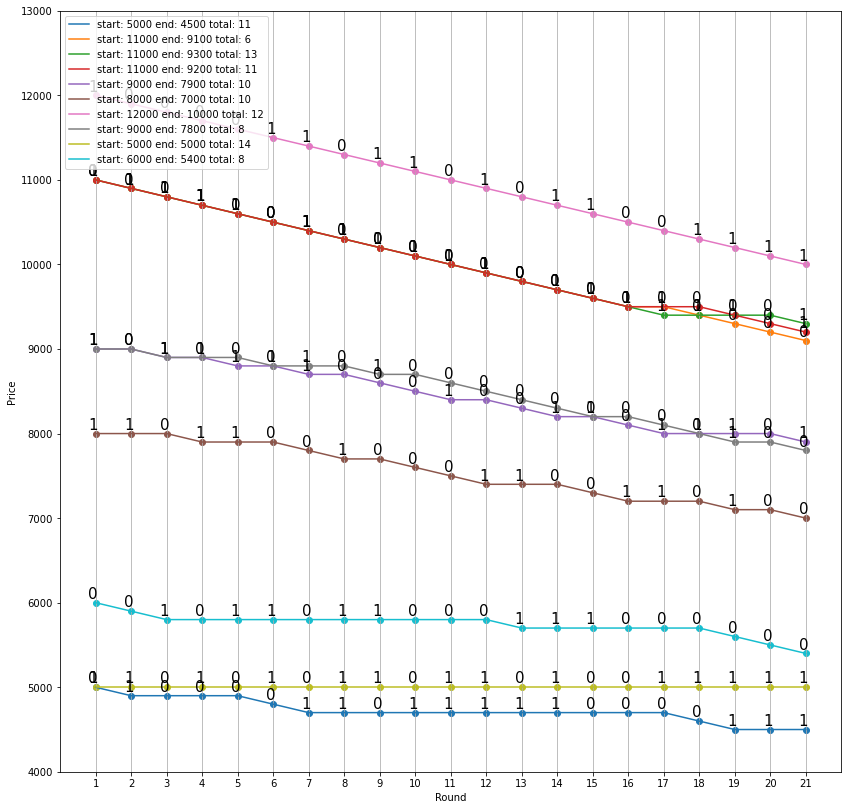

In [21]:
# constants
numberOfRounds = 20
numberOfPlayers = 10
minPoints = 0
maxPoints = 1
p1 = np.array([0,4000])
p2 = np.array([7,12000])
p3 = np.array([0,7000])
p4 = np.array([2,12000])
norm = np.linalg.norm

class Round:
    def __init__(self, roundNum, points, price):
        self.roundNum = roundNum
        self.points = points
        self.price = price
    
    def __str__(self):
        return "roundNum %s, points %s, price %s" % (self.roundNum, self.points, self.price)
    
def nextRound(player):
    currentRound = player[-1].roundNum
    points = randint(minPoints, maxPoints)
    price = calcPrice(player[-3:])
    
    player.append(Round(currentRound+1, points, price))

def calcPrice(player):
    last_round = player[-1].roundNum
    last_round_price = player[-1].price
    points = [(i.points) for i in player]
    total_points = sum(points)
    if (total_points <= 0):
        score = -1
    else:
        score = upOrDown(player[-1].points, last_round_price)
    
    #return new price
    score = math.floor(score)
    new_price = last_round_price + (score*100)
    if (new_price > 12000):
        return 12000
    elif (new_price < 4000):
        return 4000
    else:
        return new_price
    
def upOrDown(points, price):
    p0 = np.array([points, price])
    d = 0
    
    # check if above or below line a and line b
    a = ((p2[1] - p1[1])/(p2[0] - p1[0]) * p0[0]) + p1[1]
    b = ((p4[1] - p3[1])/(p4[0] - p3[0]) * p0[0]) + p3[1]
    
    if (points < 0):
        d = -1
    else:
        if (p0[1] > b):
            #print('ned')
            #d = np.abs(norm(np.cross(p4-p3, p3-p0)))/norm(p4-p3)
            #d *= -1
            d = -1
            #print(points,p0[1],int(b),d)
        elif (p0[1] < b and p0[1] > a):
            #print('blir')
            d = 0
            #print(points,p0[1],int(a),int(b),d)
        elif (p0[1] < a):
            #print('opp')
            d = np.abs(norm(np.cross(p2-p1, p1-p0)))/norm(p2-p1)
            #print(points,p0[1],int(a),d)
    
    d = math.floor(d)
    return d
    
# data of players
players = []

for i in range(numberOfPlayers):
    # init player
    player = []
    player.append(Round(1, randint(minPoints, maxPoints), randint(4,12)*1000))
    # add rounds to player
    for j in range(numberOfRounds):
        nextRound(player)
    # add player to list of players
    players.append(player)
    
    
# Plot
fig = plt.figure(figsize=(14,14))

for player in players:
    x_vals,y_vals = zip(*[(float(i.roundNum),float(i.price)) for i in player])
    points = [(i.points) for i in player]
    show = "start: "+str(player[0].price)+" end: "+str(player[-1].price)+" total: "+str(sum(points))
    
    plt.plot(x_vals, y_vals, label=show)
    plt.legend()

    # show round points
    plt.scatter(x_vals, y_vals)
    for i, txt in enumerate(points):
        plt.text(x_vals[i]-0.2, y_vals[i]+50, txt, fontsize=15)

#     print('total points '+str(sum(points)))
#     print('Start '+str(player[0].price))
#     print('end   '+str(player[-1].price))
    
plt.xlabel('Round')
plt.ylabel('Price')
plt.xticks(x_vals)
plt.grid(axis = 'x')
plt.ylim(4000, 13000)
plt.legend(loc="upper left")
plt.show()

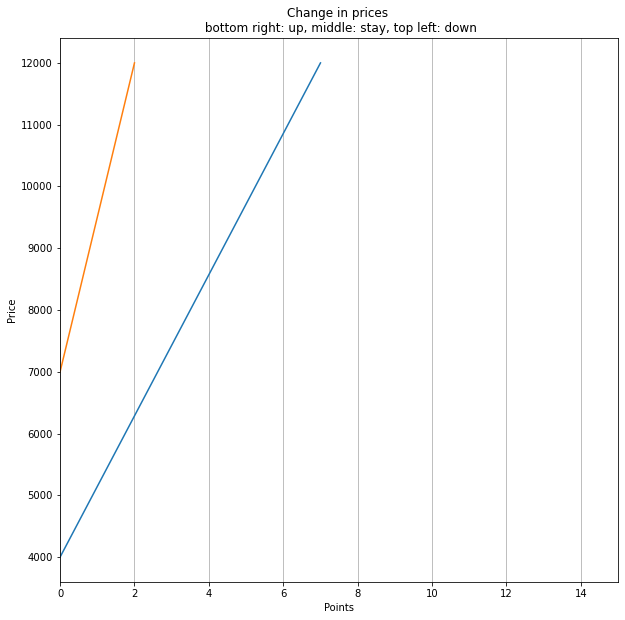

In [20]:
# Plot
fig = plt.figure(figsize=(10,10))

ax = [p1[0], p2[0]]
ay = [p1[1], p2[1]]
bx = [p3[0], p4[0]]
by = [p3[1], p4[1]]

plt.xlabel('Points')
plt.ylabel('Price')
plt.grid(axis = 'x')
plt.xlim(0, 15)
plt.plot(ax, ay)
plt.plot(bx, by)
plt.title('Change in prices \n bottom right: up, middle: stay, top left: down')
plt.show()